# Modelo de Procesamiento de Datos de Audio

Autores: 
    
## Introducción

El modelo consiste en la captura y el procesamiento de datos de audio a partir de un dispositivo móvil para desarrollar un modelo de inteligencia artificial con capacidades de clasificación.

## Marco Teórico

// Incluir marco teórico relacionado con el caso de estudio

## Descripción del problema a solucionar

Se pretende desarrollar un modelo de inteligencia artificial mediante redes neuronales que sea capaz de clasificar correctamente datos de audio con voces para las palabras: corriendo, caminando, reposo, arriba, abajo, ola, izquierda y derecha. Se pretende entrenar el modelo con audios etiquetados y comprobar su precisión mediante métricas establecidas. 

## Planteamiento de la solución

In [12]:
# importación de librerías
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Carga de los datos

In [4]:
#Función de carga para archivos de audio
def load_wav_16k_mono(filename):
    # Carga de archivo .wav
    file_contents = tf.io.read_file(filename)
    # Decodificación wav (tensores por canales)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removiendo eje final
    wav = tf.squeeze(wav, axis=-1)
    # Devuelve archivo como vector numpy
    return wav

(16000,)


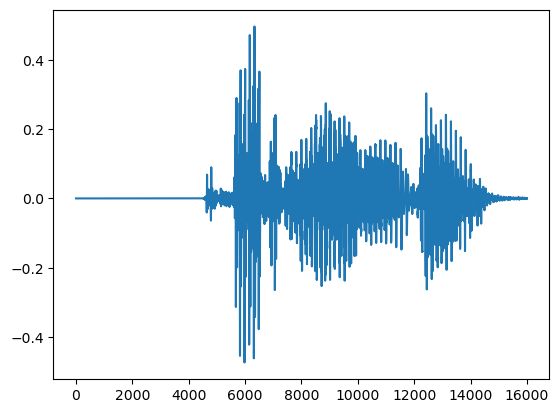

In [13]:
# Definición de ruta para archivos de audio
PATH = "../data/audio/corriendo-js1.wav"

wave = load_wav_16k_mono(PATH)
print(wave.shape)
plt.plot(wave)
display.display(display.Audio(wave, rate=16000))

In [14]:
# Función para generar espectrograma a partir de las muestras de audio.
def preprocess(wave):
    wav = wave[:16000]
    # transformada de fourier para conversión de datos
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    # valores absolutos de la transformada
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [16]:
# Prueba de la función para espectrograma
espectrograma = preprocess(wave)
print("Waveform shape:", wave.shape)
print("Spectrogram shape:", espectrograma.shape)

Waveform shape: (16000,)
Spectrogram shape: (124, 129)


In [17]:
# Función para graficar el espectrograma
# Convierte las frecuencias a una escala logarítmica 
# de manera que el tiempo se representa en el eje x (columnas).

def plot_spectrogram(espectrograma, ax):
  # conversión a escala logarítmica
  log_spec = np.log(espectrograma.T)
  # dimensiones de los datos
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  # dimensiones de la gráfica 
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  # almacenamiento del plot en el eje
  ax.pcolormesh(X, Y, log_spec)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_24092\1783517346.py:6: RuntimeWarning: divide by zero encountered in log
  log_spec = np.log(espectrograma.T)


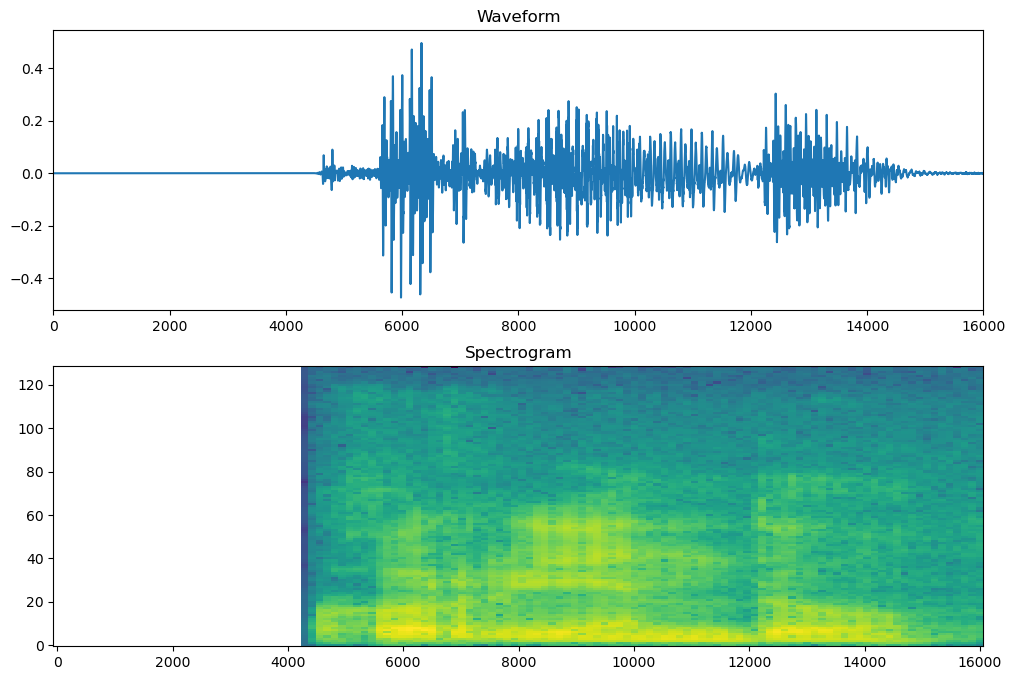

In [18]:
# Gráfica del primer audio de prueba, se establecen 2 subplots. 
# El primer subplot es para la gráfica de frecuencias
# El segundo subplot es para el espectrograma
 
fig, axes = plt.subplots(2, figsize=(12, 8))
# Se establece la escala temporal en periodos fijos
timescale = np.arange(wave.shape[0])
# configuración de los parámetros del plot
axes[0].plot(timescale, wave.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

## Resultados

// Espacio para el análisis de los resultados obtenidos

## Referencias

// Incluir referencias encontradas